# Task DL. Instrument recoginzer

- Student Name: Abu Tallaha Hussain
- Student Number: r0889906

## Imports

In [164]:
import matplotlib.pyplot as plt

import sklearn.metrics as metrics
import numpy as np
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical



## Convolution

In [165]:
model = Sequential()


model.add(Conv2D(32, (3, 3), input_shape= (64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=5))
model.add(Activation('sigmoid'))

## Compile

In [166]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Model summary

In [167]:
print(model.summary())

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
activation_45 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
activation_46 (Activation)   (None, 29, 29, 64)        0         
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 12544)           

## Image Generator

In [168]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('datasets/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('datasets/test_set',
                                            target_size = (64, 64),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 598 images belonging to 5 classes.
Found 150 images belonging to 5 classes.


## Train

In [169]:
history = model.fit(training_set,
                    steps_per_epoch = len(training_set),
                    epochs = 15,
                    validation_data = test_set)

Epoch 1/15
 5/38 [==>...........................] - ETA: 3s - loss: 1.7982 - accuracy: 0.2250

C:\Users\Talla\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:973: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


38/38 [==============================] - 6s 155ms/step - loss: 1.5846 - accuracy: 0.2793 - val_loss: 1.4939 - val_accuracy: 0.3667
Epoch 2/15
38/38 [==============================] - 6s 167ms/step - loss: 1.2586 - accuracy: 0.5033 - val_loss: 1.2946 - val_accuracy: 0.4533
Epoch 3/15
38/38 [==============================] - 7s 194ms/step - loss: 1.1253 - accuracy: 0.5552 - val_loss: 1.5580 - val_accuracy: 0.3800
Epoch 4/15
38/38 [==============================] - 8s 200ms/step - loss: 1.0509 - accuracy: 0.5953 - val_loss: 1.0763 - val_accuracy: 0.6000
Epoch 5/15
38/38 [==============================] - 6s 168ms/step - loss: 0.8609 - accuracy: 0.6906 - val_loss: 1.0135 - val_accuracy: 0.6133
Epoch 6/15
38/38 [==============================] - 7s 182ms/step - loss: 0.7784 - accuracy: 0.7274 - val_loss: 0.9829 - val_accuracy: 0.6400
Epoch 7/15
38/38 [==============================] - 7s 176ms/step - loss: 0.7154 - accuracy: 0.7274 - val_loss: 1.0546 - val_accuracy: 0.6267
Epoch 8/15
38/38 

## Model loss

Text(0.5, 1.0, 'Loss Curves')

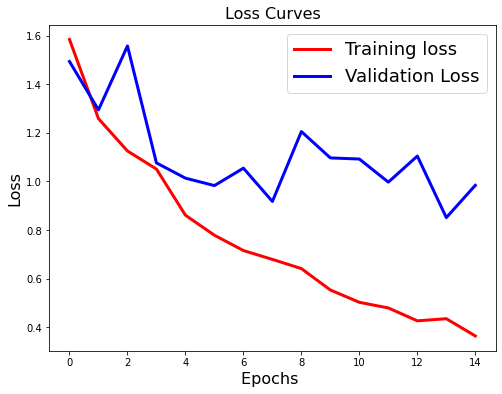

In [170]:
plt.figure(figsize=[8,6])

plt.plot(history.history['loss'],'r',linewidth=3.0)

plt.plot(history.history['val_loss'],'b',linewidth=3.0)

plt.legend(['Training loss', 'Validation Loss'],fontsize=18)

plt.xlabel('Epochs ',fontsize=16)

plt.ylabel('Loss',fontsize=16)

plt.title('Loss Curves',fontsize=16)

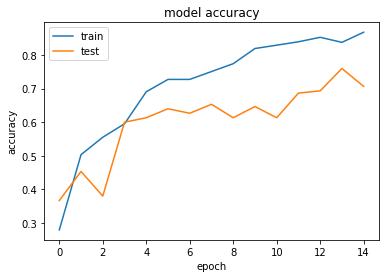

In [177]:
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.legend(['train', 'test'], loc='upper left')

plt.xlabel('epoch')

plt.ylabel('accuracy')

plt.show()

## Confusion matrix & Report

In [176]:
Y_pred = model.predict(test_set, 30)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')
target_names = ['drums','flutes','guitars','piano','trumpets']
print(classification_report(test_set.classes, y_pred, target_names=target_names))

C:\Users\Talla\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:973: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Confusion Matrix
[[ 6  7  8  5  4]
 [ 5  4  8  6  7]
 [ 4  2 13  7  4]
 [ 4  6  9  6  5]
 [ 5  7  7  3  8]]
Classification Report
              precision    recall  f1-score   support

       drums       0.25      0.20      0.22        30
      flutes       0.15      0.13      0.14        30
     guitars       0.29      0.43      0.35        30
       piano       0.22      0.20      0.21        30
    trumpets       0.29      0.27      0.28        30

    accuracy                           0.25       150
   macro avg       0.24      0.25      0.24       150
weighted avg       0.24      0.25      0.24       150



<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>
                 
***


# Conclusion

I have made a deep learning model which is capable of predicting what kind of instrument is in the image, within these 5 categories:
+ Piano
+ Guitar
+ Drums
+ Trumpet
+ Flute

I chose to work with them because i have had phases throughout my life where i have been engaged in using each of them and i also thought this could be a interesting starting project for me.

I started by downloading all the images and then extracted them. After extracting i normalized my data, so that i could split it into a training set and test set with a 80 - 20 % distribution. After having extracted and normalized my data, i split it into training and test set, with each falvour in the training set having 120 samples and each sample in the test set having 30 samples.

After doing this, i change the name of the files, using this function:

In [12]:
path = 'C:/Utveksling/Skole/AI/Hey-Waldo-master/256/notwaldo'
i = 1
for filename in os.listdir(path):
    os.rename(os.path.join(path,filename), os.path.join(path,'enwaldo'+str(i)+'.jpg'))
    i = i +1

I faced a problem that was very difficult to overcome, overfitting. I tried many different things, such as reducing the capacity of the neural network, meaning removing some of the layers. I also tried increasing the dropout of the layers. This reduced the difference between the accuracy of the training set and testing set, but it still is not optimal. It was still overfit in the end.

Another problem i faced throught this assignment is that some of the images were causing alot of trouble, for example this image:

<img src="./resources/error.JPG"  style="height: 400px"/>

It slowed down the performance by alot, and i was having some hardware issues while attempting to train my model and including this image so i decided to remove it and another similar photo. Hence why i have 598 images in the training-set.

Heres the confusion matrix from googles teachable machine, it obviously performs better than mine as mine is already faulty. 

<img src="./resources/googleCM.JPG"  style="height: 400px"/>

<img src="./resources/modelCM.JPG"  style="height: 400px"/>

### Sources:
+ https://towardsdatascience.com/handling-overfitting-in-deep-learning-models-c760ee047c6e